<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 8</span>
# <span style="color:green">Two Mode Networks and their Two Projections to One-Mode Networks

### Choose randomly a wikipedia page with a table from the "Category: Lists of websites"  https://en.wikipedia.org/wiki/Category:Lists_of_websites.

In [1]:
import random
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import wikipedia as wp
import requests
import csv
import re
import urllib2
from datetime import datetime
import os
import sys
import operator
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set interval of Table size

n = 20 # minimum number of lines of Table
N = 61 # maximum number of lines of Table

In [3]:
# This might slow but it finishes. To make it faster just reduce n (though not reccommended).

page=wp.page('Lists_of_websites')
pp=[]
pl=[p for p in page.links if "List" in p and 'Lists of lists' not in p]
random.shuffle(pl)
for p in pl:
    url="https://en.wikipedia.org/wiki/"+p.replace(" ","_")
    try:
        df=pd.read_html(url,header=0)[0]
    except ValueError:
        pass
    lp=len(df)
    if lp>n and lp<N:
        pp.append(url)
url=random.choice(pp)   
try:
    lp=len(pd.read_html(url,header=0)[0])
except ValueError:
    pass
page=url.replace("https://en.wikipedia.org/wiki/","").replace("_"," ")
print "The randomly selected Wikipedia List page is: \n '%s' \n with URL: \n %s \n and %i entries" %(page,url,lp)

The randomly selected Wikipedia List page is: 
 'List of educational video websites' 
 with URL: 
 https://en.wikipedia.org/wiki/List_of_educational_video_websites 
 and 26 entries


In [4]:
r = requests.get(url)
SNW = BeautifulSoup(r.content)
table=SNW.find('table', {'class', 'wikitable sortable'})
print type(table)
print "If type(table)=='NoneType', rerun previous cell until you get 'bs4.element.Tag' for type(table)"

<class 'bs4.element.Tag'>
If type(table)=='NoneType', rerun previous cell until you get 'bs4.element.Tag' for type(table)


In [5]:
# If instead of randomly selecting a List Wikipedia page, you want to
# start with one of your coice, insert its URL as below (uncommenting it):

# url='https://en.wikipedia.org/wiki/List_of_social_networking_websites'

In [6]:
df=pd.read_html(url,header=0)[0]
df

,Name,Discipline(s),Description,Access Cost 0,License,Provider(s)
0,60second Recap,Literature,Educational videos,Free,?,60secondcap
1,Academic Earth,Multidisciplinary,Lectures from universities,Free,?,Academic Earth
2,Coursera,Multidisciplinary,"Educational courses with lectures, quizzes and...",Free,?,Coursera
3,Do Lectures,Multidisciplinary,"Disrupters, change makers, entrepreneurs.",Free,Creative Commons Attribution–NonCommercial–Non...,YouTube
4,EdX,Multidisciplinary,"Educational courses with lectures, quizzes and...",Free,?,EdX
5,FORA.tv,Multidisciplinary,Academic videos,Free/Subscription,?,FORA.tv
6,Geoset,Multidisciplinary,"Academic videos, mainly covering Science, Engi...",Free,?,Florida State University
7,The Great Courses,Multidisciplinary,Academic videos from top professors at America...,Paid/Subscription,?,The Great Courses
8,Gresham College,Multidisciplinary,"Institution with a history of ""free public lec...",Free,?,Gresham College
9,IRIS Consortium,Multidisciplinary,"Educational Earth-science videos, animations, ...",Free,Creative Commons Attribution-NonCommercial-Sha...,IRIS Consortium


In [7]:
# # If there are unwanted symbols in the dataframe, remove them as follows:

# df = df.replace('\n','', regex=True) 
# df = df.replace(r'\[[^()]*\]','', regex=True) 
# df = df.replace(r'.*♠',' ', regex=True) 
# nco=df.Name.map(lambda x: x.replace('*','')).tolist()
# df['Name']=nco
# ncoo=df['Alexa global ranking'].map(lambda x: x.encode('ascii', 'ignore').replace(' †','')).tolist()
# df['Alexa global ranking']=ncoo
# print len(df)
# df

In [8]:
cc={}
Name=list(df.columns)
for c in Name:
    if c!=Name[0]:
        cc[c]=len(df[c].unique())
v0=min(cc.values())
mc=[]
for k,v in cc.items():
    if v==v0:
        mc.append(k)
mc
nm=random.choice(mc)
k=Name.index(nm)
print df.columns[0],len(df[df.columns[0]].unique())
print Name[k],cc[Name[k]]

Name 26
Discipline(s) 3


In [9]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[0]] 
    b=df.iloc[i][Name[k]] 
    eds.append((a,b))
print len(eds),len(set(eds))

26 26


In [10]:
# Eliminate all unicode encoding errors 

def encode_list(l):
    if type(l) == list:
        encoded_list = [a.encode("utf8", "ignore") for a in l]
    else:
        encoded_list = l
    return encoded_list

In [11]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[0] #+"s"
dc1=Name[k] #+"es"
print "The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges()))
ca=[n for n in H.nodes() if n in df[Name[0]].tolist()]
so=[n for n in H.nodes() if n not in df[Name[0]].tolist()]
nt=len(ca)
nh=len(so)
print "The %i nodes of this graph are:" %len(H.nodes())
print "%i %s and %i %s" %(nt,dc0,nh,dc1)
if nx.is_bipartite(H)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(H)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(H), "connected components"
Hl = sorted(nx.connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
Hl[0].nodes()
print 'The largest connected component has:'
# for n in Hc.nodes():
#     if type(n)==str:
#         n.encode('ascii', 'ignore')
Hcnodes=[n.encode('ascii', 'ignore') for n in Hc.nodes() if type(n)==str]
Hcedges=[]
for e in Hc.edges():
    t=[]
    if type(e[0])==str:
        t.append(e[0].encode('ascii', 'ignore'))
    if type(e[1])==str:
        t.append(e[1].encode('ascii', 'ignore'))
    Hcedges.append(tuple(t))
print "%i nodes and %i edges" %(len(Hcnodes), len(Hcedges))

The graph of Name vs. Discipline(s) has 29 nodes and 26 edges
The 29 nodes of this graph are:
26 Name and 3 Discipline(s)
This graph is bipartite
This graph is not connected and has 3 connected components
The largest connected component has:
25 nodes and 24 edges


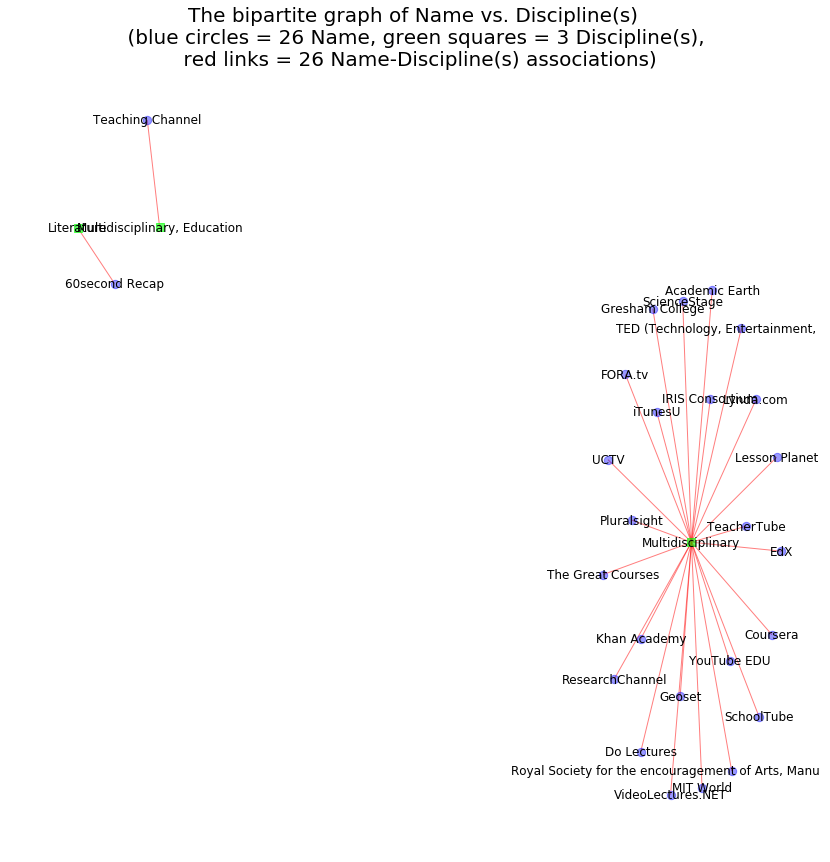

In [12]:
pos=nx.spring_layout(H,0.18)
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
# for i in H.nodes():
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=12);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');

In [13]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print max(x.values())
xx={i:j for i,j in x.items() if j>1}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice(x.items())
n0

24


'Multidisciplinary'

In [14]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in posa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in posaa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(posb.items()+posa.items()+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(posb.items()+posaa.items()+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

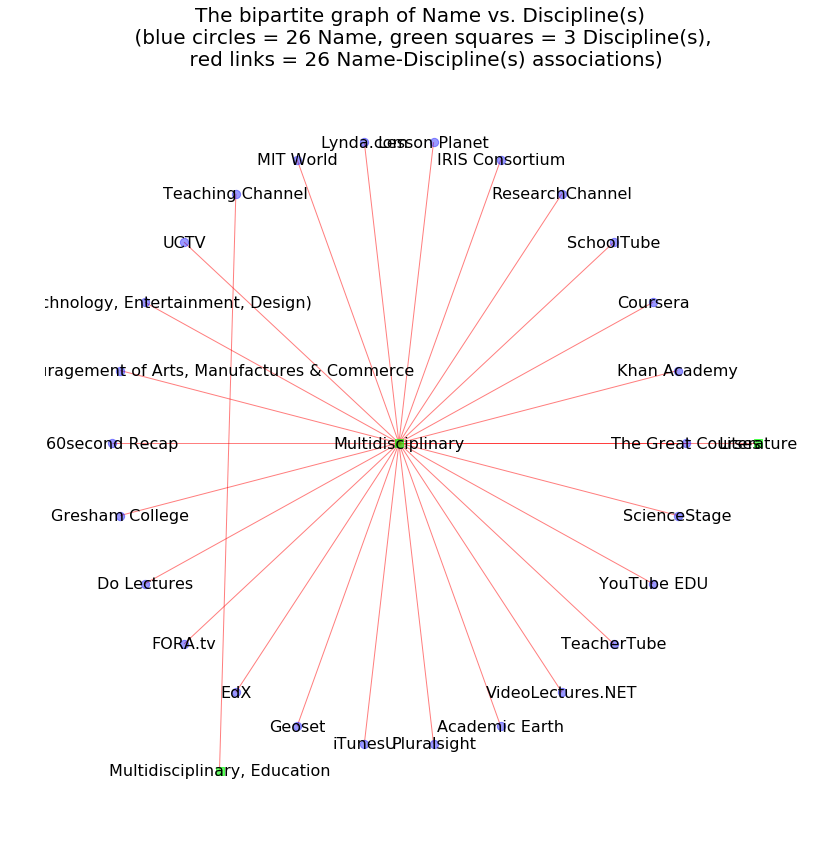

In [15]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='r',alpha=0.5);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels,font_size=16);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
plt.margins(x=0.1, y=0.1) 

### Manual Change of the Second Column

In [17]:
# Change the second column (the second mode of the bipartite graph)

clm="Provider(s)"

k=Name.index(clm)
print df.columns[0],len(df[df.columns[0]].unique())
print Name[k],cc[Name[k]]

Name 26
Provider(s) 25


In [18]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[0]] 
    b=df.iloc[i][Name[k]] 
    eds.append((a,b))
print len(eds),len(set(eds))

26 26


In [19]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[0] #+"s"
dc1=Name[k] #+"es"
print "The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges()))
ca=[n for n in H.nodes() if n in df[Name[0]].tolist()]
so=[n for n in H.nodes() if n not in df[Name[0]].tolist()]
nt=len(ca)
nh=len(so)
print "The %i nodes of this graph are:" %len(H.nodes())
print "%i %s and %i %s" %(nt,dc0,nh,dc1)
if nx.is_bipartite(H)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(H)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(H), "connected components"
Hl = sorted(nx.connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
print 'The largest connected component has:'
print "%i nodes and %i edges" %(len(Hc.nodes()), len(Hc.edges()))

The graph of Name vs. Provider(s) has 34 nodes and 26 edges
The 34 nodes of this graph are:
26 Name and 8 Provider(s)
This graph is not bipartite
This graph is not connected and has 25 connected components
The largest connected component has:
3 nodes and 2 edges


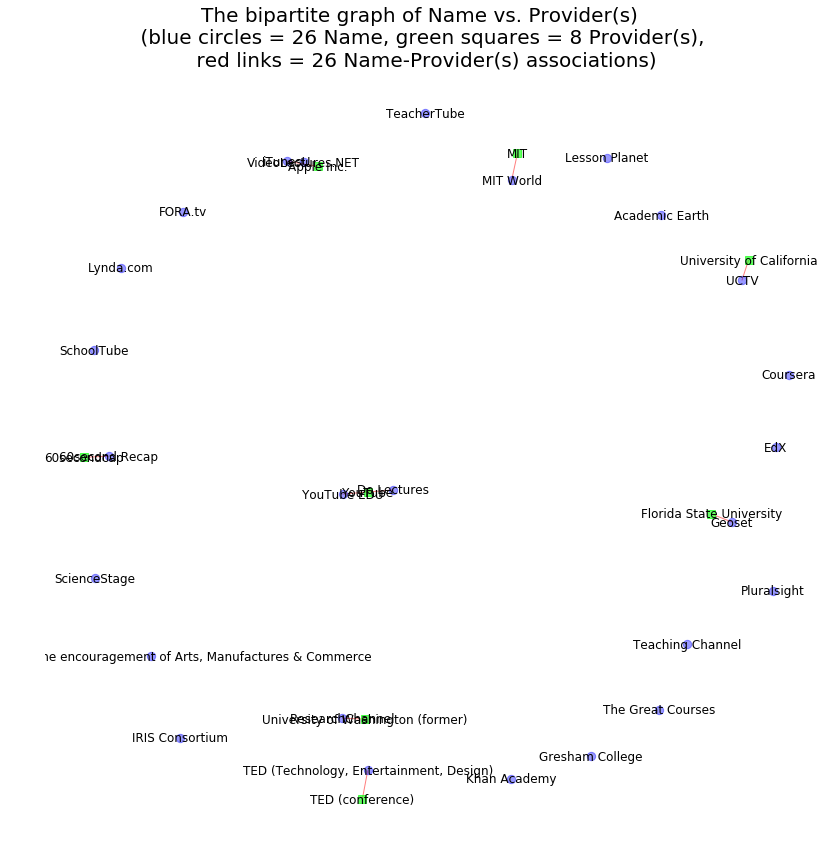

In [20]:
pos=nx.spring_layout(H,0.18)
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
# for i in H.nodes():
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=12);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');

In [21]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print max(x.values())
xx={i:j for i,j in x.items() if j>1}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice(x.items())
n0

2


'YouTube'

In [22]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in posa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in posaa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(posb.items()+posa.items()+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(posb.items()+posaa.items()+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

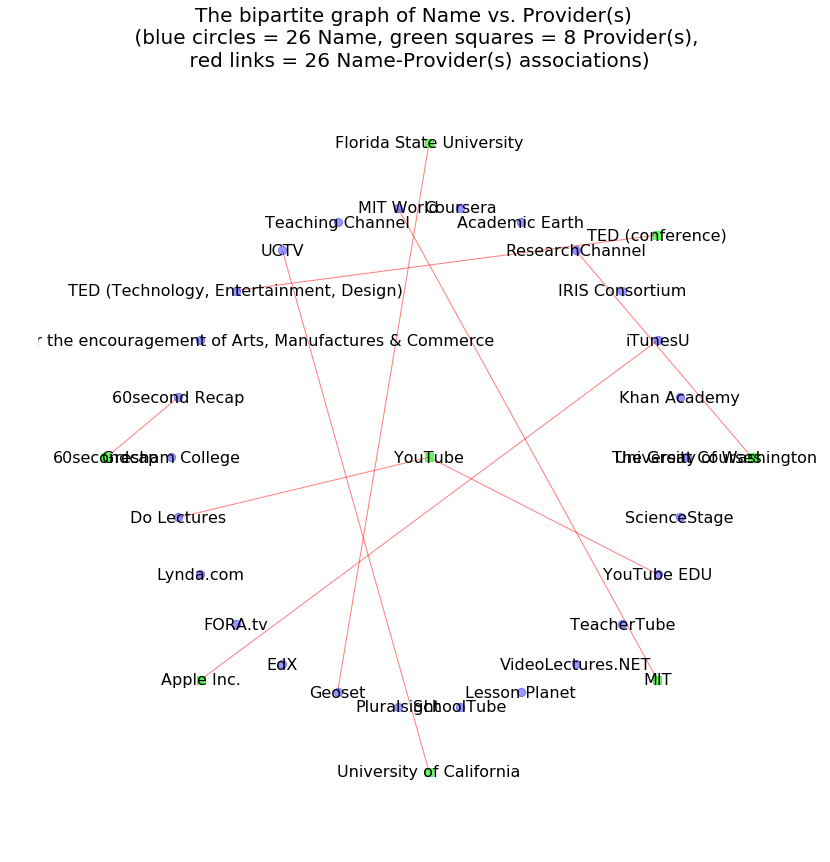

In [23]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='r',alpha=0.5);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels,font_size=16);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
plt.margins(x=0.1, y=0.1) 